In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls data/

heart_test.csv	heart_train.csv  household_power_consumption.csv


In [3]:
train_data = pd.read_csv('data/heart_train.csv')
test_data = pd.read_csv('data/heart_test.csv')
dataset = pd.concat([train_data, test_data])

In [4]:
dataset.size

4242

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [7]:
dataset.select_dtypes(include='category').columns

Index([], dtype='object')

In [8]:
dataset.select_dtypes(include='number').columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
dataset.select_dtypes(include='bool').columns

Index([], dtype='object')

In [10]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

There are categorical and boolean columns in this dataset, however they have already been encoded 

# Values and frequency distribution

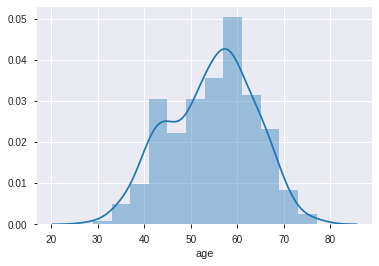

In [11]:
sns.distplot(dataset['age'], kde=True)

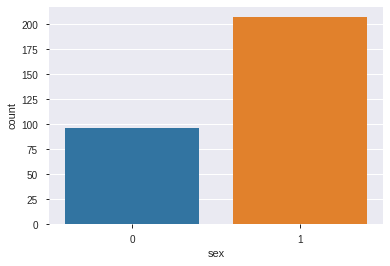

In [27]:
sns.countplot(x='sex', data=dataset)

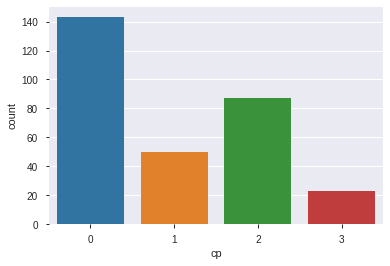

In [28]:
sns.countplot(x='cp', data=dataset)

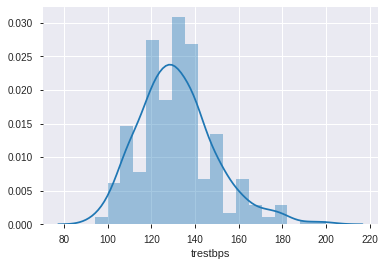

In [14]:
sns.distplot(dataset['trestbps'], kde=True)

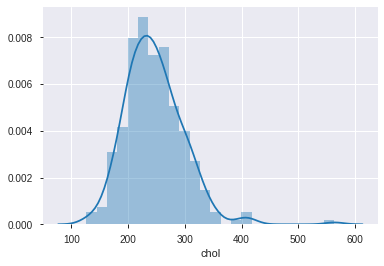

In [15]:
sns.distplot(dataset['chol'], kde=True)

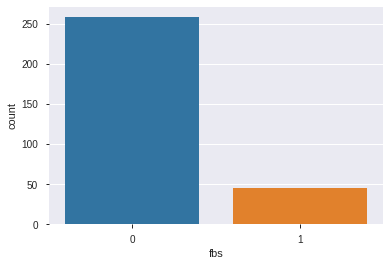

In [29]:
sns.countplot(x='fbs', data=dataset)

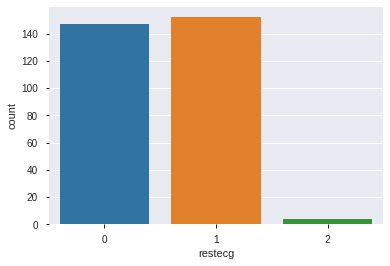

In [30]:
sns.countplot(x='restecg', data=dataset)

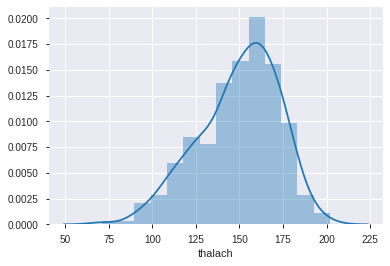

In [18]:
sns.distplot(dataset['thalach'], kde=True)

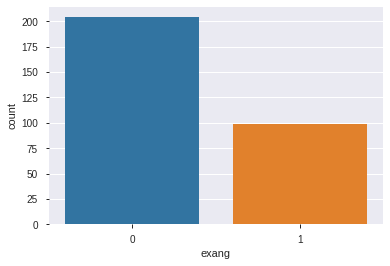

In [31]:
sns.countplot(x='exang', data=dataset)

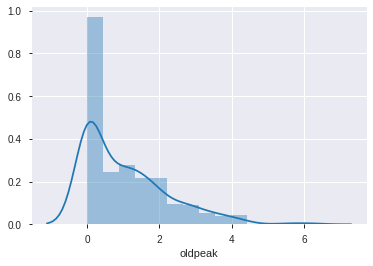

In [20]:
sns.distplot(dataset['oldpeak'], kde=True)

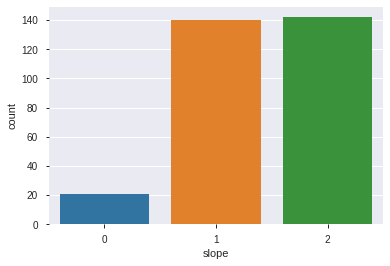

In [32]:
sns.countplot(x='slope', data=dataset)

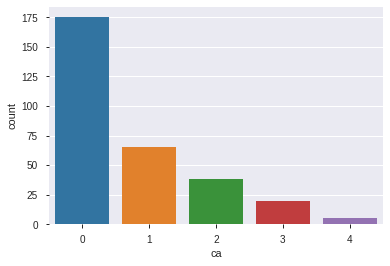

In [33]:
sns.countplot(x='ca', data=dataset)

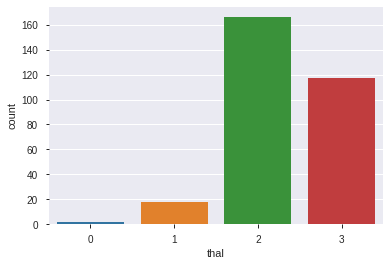

In [34]:
sns.countplot(x='thal', data=dataset)

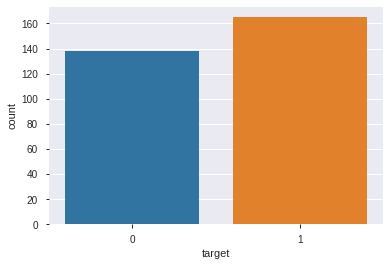

In [35]:
sns.countplot(x='target', data=dataset)

# Detecting outliers

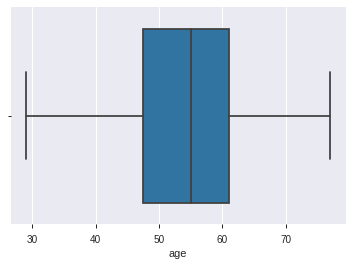

In [49]:
sns.boxplot(x=dataset['age'])

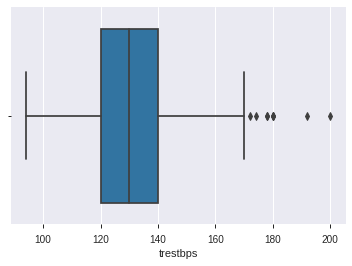

In [44]:
sns.boxplot(x=dataset['trestbps'])

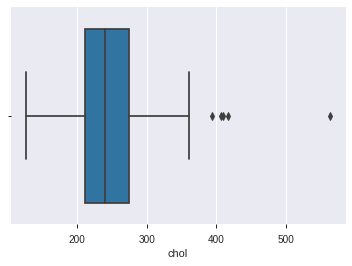

In [46]:
sns.boxplot(x=dataset['chol'])

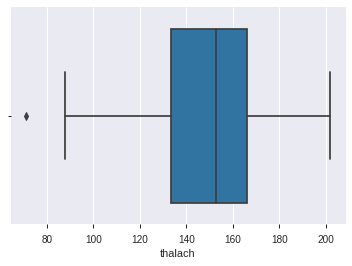

In [47]:
sns.boxplot(x=dataset['thalach'])

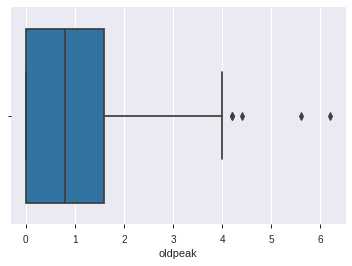

In [50]:
sns.boxplot(x=dataset['oldpeak'])

In [70]:
features = ['trestbps', 'chol', 'thalach', 'oldpeak']
outliers = np.zeros((dataset['trestbps'].size), dtype=int)
for feature in features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers |= (dataset[feature] < (Q1 - 1.5 * IQR)) | (dataset[feature] > (Q3 + 1.5 * IQR))
outliers[outliers==True].size

19

# Correlation between columns

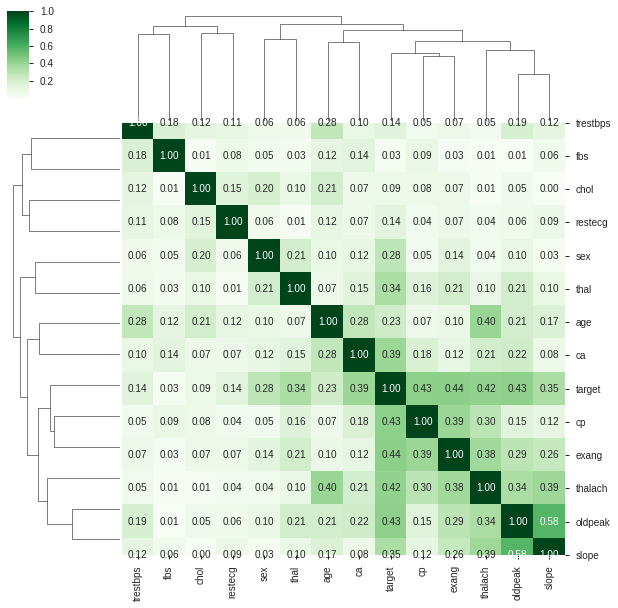

In [25]:
sns.clustermap(data=dataset.corr().abs(), annot=True, fmt='.2f', cmap='Greens')

As we can see, there are no columns in this dataset sheet that would strongly correlate with each other

# Preprocessing

Encoding is not required because all data is already encoded. Therefore, I will perform only standardization of data, to improve the results during training and I will also delete outliers

In [78]:
# Delete outliers from dataset
dataset = dataset.loc[outliers[outliers==False].index, :]
dataset.set_index(np.arange(dataset.shape[0]), inplace=True)
dataset.shape

(284, 14)

In [79]:
# Standartization
arr = dataset.to_numpy()
mean = arr.mean(axis=0)
std = arr.std(axis=0)
arr = (arr - mean)/std

In [87]:
# Generate X and y for model training
X = dataset.drop('target', axis=1).to_numpy()
y = dataset.loc[:, 'target'].to_numpy()

#  Automatic report for the dataset via pandas_profiling library

In [5]:
pp.ProfileReport(dataset)

# Conclusion

After this analysis, I would use all the columns, since all the columns carry useful information. There are also no columns in which too many values are missed and columns, which correlate strongly with each other.